# Machine Learning
## import libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

## Bereinigen

In [2]:
def price_to_float(price):
    price = float(price.replace('$','').replace(',',''))
    return price

In [3]:
def outlier(df, column):
    df[column] = df[column]._get_numeric_data()
    q1 = df[column].quantile(0.25)
    print(q1)
    q3 = df[column].quantile(0.75)
    print(q3)
    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)

    df = df.drop(df[df[column] < lower_bound].index)
    df = df.drop(df[df[column] > upper_bound].index)
            
    
    return(df)

In [4]:
listings = pd.read_csv('~/studies/analytics/listings.csv')
original = listings.copy()
listings.dropna()
listings.shape
listings['price'] = listings['price'].map(price_to_float)
listings['price']
df = listings[['beds', 'bedrooms', 'room_type', 'price']]
df.dropna()

,beds,bedrooms,room_type,price
0,1.0,1.0,Private room,21.0
1,2.0,1.0,Entire home/apt,60.0
2,2.0,1.0,Entire home/apt,90.0
3,1.0,1.0,Private room,28.0
4,1.0,1.0,Entire home/apt,125.0
...,...,...,...,...
24417,1.0,1.0,Private room,54.0
24418,0.0,0.0,Entire home/apt,60.0
24419,1.0,0.0,Private room,36.0
24420,2.0,1.0,Private room,50.0


In [36]:
for i in original.columns:
    print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [5]:
df = df[df['beds'].notna() == True]
df = df[df['bedrooms'].notna() == True]

In [6]:
df = pd.get_dummies(data=df, columns=['room_type'], drop_first=True)

In [7]:
df = outlier(df, 'price')
df = outlier(df, 'beds')
df = outlier(df, 'bedrooms')

33.0
75.0
1.0
2.0
1.0
1.0


## Trainings-/Testdaten

In [8]:
X = df.drop(columns=['price'])
y = df['price'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.fit_transform(X_test)

In [11]:
y_train_scaled = min_max_scaler.fit_transform(y_train.reshape(-1,1))
y_test_scaled = min_max_scaler.fit_transform(y_test.reshape(-1,1))

## k-nearest-neighbor

In [12]:
knn = KNeighborsRegressor(n_neighbors=1)

In [13]:
knn.fit(X_train_scaled, y_train_scaled)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [14]:
y_pred = knn.predict(X_test_scaled)

In [15]:
mean_squared_error(y_test_scaled, y_pred)

0.051106785047078725

In [28]:
y_test_scaled

array([[0.2189781 ],
       [0.1459854 ],
       [0.18248175],
       ...,
       [0.20437956],
       [0.18248175],
       [0.2189781 ]])

In [31]:
pd.DataFrame([y_test_scaled[:,0], y_pred[:,0]]).transpose()

,0,1
0,0.218978,0.181159
1,0.145985,0.181159
2,0.182482,0.181159
3,0.408759,0.326087
4,0.255474,0.181159
...,...,...
5760,0.248175,0.181159
5761,0.547445,0.181159
5762,0.204380,0.181159
5763,0.182482,0.181159


## Linear Regression
#### Alle Features

In [16]:
reg = LinearRegression().fit(X_train_scaled, y_train_scaled)

In [17]:
reg.coef_

array([[ 8.03502581e-02,  5.55111512e-17,  7.91989904e-02,
        -1.87316950e-01, -2.32996945e-01]])

In [18]:
reg.intercept_

array([0.42990041])

In [19]:
y_pred_lin = reg.predict(X_test_scaled)

In [20]:
mean_squared_error(y_test_scaled, y_pred_lin)

0.02143400395072975

#### Ein Feature

In [21]:
reg_single = LinearRegression().fit(X_train['beds'].to_numpy().reshape(-1,1), y_train)

In [22]:
y_pred_single = reg_single.predict(X_test['beds'].to_numpy().reshape(-1,1))

In [23]:
reg_single.coef_

array([8.62388277])

In [24]:
reg_single.intercept_

37.005659048657776

In [25]:
mean_squared_error(y_test, y_pred_single)

548.8408716230032

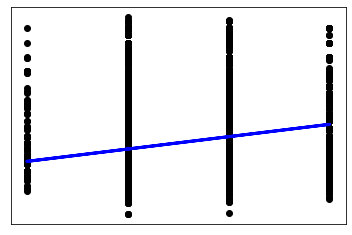

In [26]:
plt.scatter(X_train['beds'].to_numpy().reshape(-1,1), y_train, color = 'black')
plt.plot(X_test['beds'].to_numpy().reshape(-1,1), y_pred_single, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()